# Pycbc: Matched filter
pycbc its a python toolkit for analysis of data from gravitational-wave laser interferometer detectors with the goal of detecting and studying signals from compact binary coalescences (CBCs). For more, see [pycbc](https://github.com/gwastro/pycbc)

We will use this library in order to test how a well implemented matched filter works. Since pycbc use regular sampling was not usefull for our goals.

Here we are going to check how this library implements the matched filter.

In [1]:
import pycbc.psd
import pycbc.noise
import pycbc.waveform
import pycbc.filter as flt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
help(flt.matchedfilter.matched_filter)

Help on function matched_filter in module pycbc.filter.matchedfilter:

matched_filter(template, data, psd=None, low_frequency_cutoff=None, high_frequency_cutoff=None, sigmasq=None)
    Return the complex snr.
    
    Return the complex snr, along with its associated normalization of the
    template, matched filtered against the data.
    
    Parameters
    ----------
    template : TimeSeries or FrequencySeries
        The template waveform
    data : TimeSeries or FrequencySeries
        The strain data to be filtered.
    psd : FrequencySeries
        The noise weighting of the filter.
    low_frequency_cutoff : {None, float}, optional
        The frequency to begin the filter calculation. If None, begin at the
        first frequency after DC.
    high_frequency_cutoff : {None, float}, optional
        The frequency to stop the filter calculation. If None, continue to the
        the nyquist frequency.
    sigmasq : {None, float}, optional
        The template normalization. If n

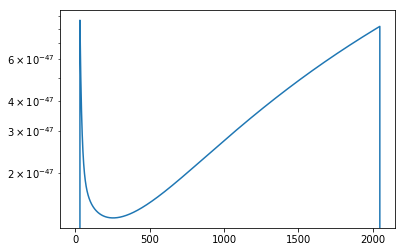

In [3]:
# Generate some noise with an advanced ligo psd
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
plt.semilogy(psd.get_sample_frequencies(), psd)

In [5]:
# Generate 16 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(16 / delta_t)
strain = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
stilde = strain.to_frequencyseries()

# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_fd_waveform(approximant="SEOBNRv2",
                             mass1=25, mass2=25,
                             f_lower=flow, delta_f=stilde.delta_f)

ValueError: Approximant SEOBNRv2 not available

In [ ]:
%debug